<h1 style="font-family: 'Indie Flower', cursive;;font-size: 300%;text-align:center;">WeRateDogs Twitter Analysis</h1>

<img src="https://i.pinimg.com/236x/17/7a/ea/177aea93ccb9ae2e2b49f2961209d827--goofy-dog-funny-memes.jpg" style="border-radius:100%"> 

# Introduction

#### WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. </br>These ratings almost always have a denominator of 10. </br>The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

# Importing Libraries Needed

In [181]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
import json
from pandasql import sqldf
import requests
from bs4 import BeautifulSoup
import re
from PIL import Image
from io import BytesIO
from skimage import io
%matplotlib inline

# Gathering Data 

## 1. Downloading the data

#### **1. The Data queried from twitter API (tweet-json.txt)**

In [2]:
#!wget https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt tweet-json.txt

#### **2. The enhanced Twitter archive csv file (twitter-archive-enhanced-2.csv)**

In [3]:
#!wget https://video.udacity-data.com/topher/2018/November/5bf60c1e_twitter-archive-enhanced-2/twitter-archive-enhanced-2.csv twitter-archive-enhanced-2.csv

#### **3. The Result of the image prediction Nerual Network (image-predictions-3.tsv)**

In [4]:
#!wget https://video.udacity-data.com/topher/2018/November/5bf60c69_image-predictions-3/image-predictions-3.tsv image-predictions-3.tsv

## 2. Reading the downloaded data into a Pandas Dataframes

In [5]:
archive = pd.read_csv("twitter-archive-enhanced-2.csv")
arch_df=archive.copy()
arch_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
predictions = pd.read_csv("image-predictions-3.tsv",sep="\t")
predictions_df=predictions.copy()
predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
df_list=[]
with open("tweet-json.txt","r") as file:
    for line in file.readlines():
        example_dict = json.loads(line)
        df_list.append(example_dict)
api=pd.DataFrame(df_list)
api_df=api.copy()
api_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


# Assessing Data

In [8]:
def summarize_column(col,Value_counts=False):
    '''
    This functions asses the column
    1-Printing a random sample of 5 obeservations of the column 
    2-Counts the missing values
    3-Counts the duplicated values in the column
    4-If Value_counts = True will return value_counts for this column
    '''
    print("1-5 Random samples")
    print('====================')
    for x in col.sample(5):
        print(x)
        print('====================')
    print('=======================================')
    print("2.Missing Values = {} out of {}".format(col.isnull().sum(),col.shape[0]))
    print('=======================================')
    print("3-Duplicated Values = {} out of {}".format(col.duplicated().sum(),col.shape[0]))
    if Value_counts:
        print('=======================================')
        print(col.value_counts())

### **1. The Twitter Archive Dataframe `arch_df`**

In [9]:
arch_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
1270,709449600415961088,NaN,NaN,2016-03-14 18:42:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Karma. She's just a head. Lost body durin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709449600...,10,10,Karma,None,None,None,None
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo
2020,672095186491711488,NaN,NaN,2015-12-02 16:49:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tuco. That's the toast that killed his...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672095186...,9,10,Tuco,None,None,None,None
360,829861396166877184,NaN,NaN,2017-02-10 01:15:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mia. She already knows she's a good do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829861396...,12,10,Mia,None,None,None,None


In [10]:
arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
arch_df.duplicated().sum()

0

=======================================================

1.`tweet_id` column 

In [12]:
summarize_column(arch_df.tweet_id)

1-5 Random samples
667443425659232256
670073503555706880
732726085725589504
828011680017821696
854010172552949760
2.Missing Values = 0 out of 2356
3-Duplicated Values = 0 out of 2356


In [13]:
(arch_df.tweet_id.astype(str).apply(len))[0]

18

In [14]:
((arch_df.tweet_id.astype(str).apply(len))!=18).sum()

0

=======================================================

2. `text` column 

In [15]:
summarize_column(arch_df.text)

1-5 Random samples
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
Have you ever seen such a smol pupper? Portable af. 12/10 would keep in shirt pocket https://t.co/KsqaIzlQ12
This is Monty. He makes instantly regrettable decisions. Couldn't help himself. It looked like a ghost lollipop. 12/10 mistake happen https://t.co/8Wsr6b4RjE
Can take selfies 11/10 https://t.co/ws2AMaNwPW
HE WAS JUST A LIL SLEEPY FROM BEING SUCH A GOOD DOGGI ALL THE TIME MISTAKES HAPPEN 13/10
https://t.co/G2ms0A5jWM
2.Missing Values = 0 out of 2356
3-Duplicated Values = 0 out of 2356


=======================================================

3. `expanded_urls` column 

In [16]:
summarize_column(arch_df.expanded_urls)

1-5 Random samples
https://twitter.com/dog_rates/status/780931614150983680/photo/1
https://twitter.com/dog_rates/status/718460005985447936/photo/1
https://twitter.com/dog_rates/status/875144289856114688/video/1
https://twitter.com/dog_rates/status/817777686764523521/video/1
https://twitter.com/dog_rates/status/710283270106132480/photo/1,https://twitter.com/dog_rates/status/710283270106132480/photo/1
2.Missing Values = 59 out of 2356
3-Duplicated Values = 137 out of 2356


=======================================================

4. `rating_numerator` column 

In [17]:
summarize_column(arch_df.rating_numerator)

1-5 Random samples
7
10
13
12
12
2.Missing Values = 0 out of 2356
3-Duplicated Values = 2316 out of 2356


=======================================================

5. `rating_denumerator` column 

In [18]:
summarize_column(arch_df.rating_denominator)

1-5 Random samples
10
10
10
10
10
2.Missing Values = 0 out of 2356
3-Duplicated Values = 2338 out of 2356


=======================================================

6. `name` column 

In [19]:
summarize_column(arch_df.name,Value_counts=True)

1-5 Random samples
Maggie
Ebby
Tyrone
Liam
Rolf
2.Missing Values = 0 out of 2356
3-Duplicated Values = 1399 out of 2356
None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Jim          1
Fillup       1
Theo         1
Ferg         1
Dewey        1
Name: name, Length: 957, dtype: int64


===================================================================================
===================================================================================

### **2. The Twitter API Dataframe `api_df`**

In [20]:
api_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [21]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [22]:
api_df[api_df['retweeted_status'].notnull()].head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
31,Sat Jul 15 02:45:48 +0000 2017,886054160059072513,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,False,False,und,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,8.860534e+17,886053434075471873,NaN
35,Thu Jul 13 01:35:06 +0000 2017,885311592912609280,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,False,False,en,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,NaN,NaN,NaN
67,Mon Jun 26 00:13:58 +0000 2017,879130579576475649,879130579576475649,RT @dog_rates: This is Emmy. She was adopted t...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,NaN,NaN,NaN
72,Sat Jun 24 00:09:53 +0000 2017,878404777348136964,878404777348136964,RT @dog_rates: Meet Shadow. In an attempt to r...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,NaN,NaN,NaN
73,Fri Jun 23 18:17:33 +0000 2017,878316110768087041,878316110768087041,RT @dog_rates: Meet Terrance. He's being yelle...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,NaN,NaN,NaN


#### Since we will be joining the two data frames `api_df` and `arch_df`, we should check if they match in number of observations or not 

In [23]:
api_df.shape[0],arch_df.shape[0]

(2354, 2356)

In [24]:
summarize_column(api_df.id)

1-5 Random samples
668655139528511488
672604026190569472
684567543613382656
834167344700198914
671357843010908160
2.Missing Values = 0 out of 2354
3-Duplicated Values = 0 out of 2354


#### api_df is missing two tweets from the arch_df , we should check wich tweets 

In [25]:
set(arch_df.tweet_id).difference(api_df.id)

{771004394259247104, 888202515573088257}

#### Since we will be needing the `retweet_count` and `favorite_count` only , we should take a look at them 

In [26]:
summarize_column(api_df.retweet_count)

1-5 Random samples
2532
955
3
1551
7574
2.Missing Values = 0 out of 2354
3-Duplicated Values = 630 out of 2354


In [27]:
summarize_column(api_df.favorite_count)

1-5 Random samples
1953
2163
2299
8277
7508
2.Missing Values = 0 out of 2354
3-Duplicated Values = 347 out of 2354


In [28]:
api_df.entities[15]

{'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 889278779352338437,
   'id_str': '889278779352338437',
   'indices': [139, 162],
   'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/889278779352338437/pu/img/VlbFB3v8H8VwzVNY.jpg',
   'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/889278779352338437/pu/img/VlbFB3v8H8VwzVNY.jpg',
   'url': 'https://t.co/WpHvrQedPb',
   'display_url': 'pic.twitter.com/WpHvrQedPb',
   'expanded_url': 'https://twitter.com/dog_rates/status/889278841981685760/video/1',
   'type': 'photo',
   'sizes': {'small': {'w': 320, 'h': 568, 'resize': 'fit'},
    'large': {'w': 320, 'h': 568, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 320, 'h': 568, 'resize': 'fit'}}}]}

In [29]:
summarize_column(api_df.lang,Value_counts=True)

1-5 Random samples
en
en
en
en
en
2.Missing Values = 0 out of 2354
3-Duplicated Values = 2345 out of 2354
en     2336
und       7
in        3
nl        3
et        1
tl        1
ro        1
eu        1
es        1
Name: lang, dtype: int64


===================================================================================
===================================================================================

### **3. The Image Predictions Dataframe `predictions_df`**

In [30]:
predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [31]:
arch_df.shape[0]-predictions_df.tweet_id.shape[0]

281

In [32]:
summarize_column(predictions_df.tweet_id)

1-5 Random samples
709519240576036864
683834909291606017
830956169170665475
886366144734445568
671768281401958400
2.Missing Values = 0 out of 2075
3-Duplicated Values = 0 out of 2075


In [33]:
summarize_column(predictions_df.jpg_url,Value_counts=True)

1-5 Random samples
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg
https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg
https://pbs.twimg.com/media/C4lzqQ4UEAApzU0.jpg
https://pbs.twimg.com/media/CczOp_OWoAAo5zR.jpg
https://pbs.twimg.com/media/CrcPjh0WcAA_SPT.jpg
2.Missing Values = 0 out of 2075
3-Duplicated Values = 66 out of 2075
https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg                                2
https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg                                            2
https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg                                            2
https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg                                            2
https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CVQ3EDdWIAINyhM.jpg                                            1
https://pbs.twimg.co

In [34]:
summarize_column(predictions_df.p1,Value_counts=True)

1-5 Random samples
Samoyed
toy_poodle
Bedlington_terrier
Newfoundland
Chihuahua
2.Missing Values = 0 out of 2075
3-Duplicated Values = 1697 out of 2075
golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
cheetah                 1
espresso                1
Scotch_terrier          1
shopping_basket         1
leaf_beetle             1
Name: p1, Length: 378, dtype: int64


## **Quality Issues** 

#### **1. The Twitter Archive Dataframe `arch_df`**

- Missing Values in `in_reply_to_status_id` , `in_reply_to_user_id` , `retweeted_status_id` , `retweeted_status_user_id` , `retweeted_status_timestamp` , probably will be dropped

- `source` column is written in the html format needs to be string 

- `timestamp` column needs to be transformed into a timestamp data type instead of string

- `expanded_urls` </br>1. 59 Missing values</br>2. Duplicated links in a single cell</br>3. 137 duplicated rows with the same expanded url</br>4. Non twitter Links  </br>5. Some links aren't from twitter

- remove retweets spoted in the `api_df`.retweet_status isn't null by their id 

- some values in `rates_denomenator` and `rating_numerator` doesn't match the rates in text 

- `text` : Contains some ads not ratings in the column "WeRateDogs stickers are here and they're 12/10! Use code "puppers" at checkout 🐶🐾 Shop now: https://t.co/k5xsufRKYm https://t.co/ShXk46V13r" id = 709901256215666688

- `name` : Null (missing) values are expressed as None (745) Value , Some Names are only one letter "a" (55 name) 

#### **2. The Twitter API Dataframe `api_df`**

- The Dataframe missing the follwing tweets with ids 771004394259247104, 888202515573088257 compared to the archived Dataframe `arch_df`

- Not all tweets has images 

- 79 tweets are retweets which we don't want 

#### **3. The Image Predictions Dataframe `predictions_df`**

- 281 Missing Predictions compared to the archived tweets data set  


```python
urls=[]
skip=0
for x in api_df.entities.values:
    try:
        urls.append(x['media'][0]['media_url_https'])
    except:
        skip+=1
len(urls),skip
```



- 66 Duplicated `jpg_url` .. since there's no duplicated tweet_id , so the duplicated image url is either a an error of Original Data gathering for the data set feeding the neural network , or they're retweets, this can be checked from the `api_df` dataframe 

- Some Dog breed names in `p1` isn't Capitalized and the delimter is `_`

## **Tidiness Issues** 

#### **1. The Twitter Archive Dataframe `arch_df`**

- `text` column : </br> 1. Hashtag need to be in a single column (entites column in `api_df` will help)


- `expanded_urls` column :
</br> 1. Some links are Fundraising need to be in a single column 

- `doggo`,`floof(er)`,`pupper`,`puppo` columns needs to be melted into a single column "Dog_Stage" and extract another values `snoot` , `bleb`if available according to the dictionary 


<img src=https://video.udacity-data.com/topher/2017/October/59e04ceb_dogtionary-combined/dogtionary-combined.png>

#### **2. The Twitter API Dataframe `api_df`**

- The `entities` column will help us to attaing the missing values of expanded urls in the `arch_df` data frame , also the hashtags 

#### **3. All of the dataframes needs to be merged into one dataframe since we only have on observetional unit the "Tweet"**

===================================================================================
===================================================================================

# **Cleaning Data**

### **1. The Twitter Archive Dataframe `arch_df`**

#### **Define** 

- Missing Values in `in_reply_to_status_id` , `in_reply_to_user_id` , `retweeted_status_id` , `retweeted_status_user_id` , `retweeted_status_timestamp` , probably will be dropped

We won't need this columns in our Analysis so it'll be better if we dropped them

#### **Code** 

In [35]:
cols=["in_reply_to_status_id" , "in_reply_to_user_id" , "retweeted_status_id" , "retweeted_status_user_id" , "retweeted_status_timestamp"]
arch_df.drop(columns=cols,inplace=True)

#### **Test**

In [36]:
np.where(arch_df.columns.values==cols,True,False).sum()

/home/shapiro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


0

#### **Define** 

- `source` column is written in the html format needs to be string of url 

In [37]:
arch_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### **Code** 

In [38]:
arch_df.source=arch_df.source.str.extract('((http|https)://\S[^"]+)')[0]

#### **Test**

In [39]:
arch_df.source.value_counts()

http://twitter.com/download/iphone              2221
http://vine.co                                    91
http://twitter.com                                33
https://about.twitter.com/products/tweetdeck      11
Name: source, dtype: int64

#### **Define** 

- `timestamp` column needs to be transformed into a timestamp data type instead of string

#### **Code** 

In [40]:
arch_df.timestamp=pd.to_datetime(arch_df.timestamp)

#### **Test**

In [41]:
type(arch_df.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

#### **Define** 

- `expanded_urls` </br>1. 59 Missing values</br>2. Duplicated links in a single cell</br>3. 137 duplicated rows with the same expanded url</br>4. Non twitter Links  

1. 59 Missing values

In [42]:
arch_df.expanded_urls[5]

'https://twitter.com/dog_rates/status/891087950875897856/photo/1'

Since the expanded urls has the same format of "https://twitter.com/dog_rates/status/id" we can use this the tweet_id column to refill the missing values of the expanded urls

#### **Code** 

In [43]:
missing_urls_tweets=arch_df.expanded_urls.isna()
missing_urls_id=arch_df[missing_urls_tweets].tweet_id
missing_links=["https://twitter.com/dog_rates/status/{}".format(str(x)) for x in missing_urls_id]
missing_links=pd.Series(missing_links)
missing_links.index=arch_df[missing_urls_tweets].expanded_urls.index
missing_links
arch_df.loc[missing_urls_tweets,'expanded_urls']=missing_links

#### **Test**

In [44]:
arch_df.expanded_urls.isna().sum()

0

2. Duplicated links in a single cell

First of all we should drop the retweets we knew from api_df retweeted status column, from both the api_df and arch_df dataframes

In [45]:
retweeted=api_df['retweeted_status'].notnull()
retweeted_id=list(api_df[retweeted].id_str)
print("api_df rows before drop ={}".format(api_df.shape[0]))
api_df=api_df[~retweeted]
api_df.reset_index(drop=True,inplace=True)
print("api_df rows after drop ={}".format(api_df.shape[0]))
print("=====================================================")
print("arch_df rows before drop ={}".format(arch_df.shape[0]))
arch_df=arch_df[~arch_df['tweet_id'].isin(retweeted_id)]
arch_df.reset_index(drop=True,inplace=True)
print("arch_df after after drop ={}".format(arch_df.shape[0]))

api_df rows before drop =2354
api_df rows after drop =2175
arch_df rows before drop =2356
arch_df after after drop =2177


In [46]:
arch_df[(~arch_df.tweet_id.isin(api_df.id_str))]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,2017-07-21 01:02:36+00:00,http://twitter.com/download/iphone,RT @dog_rates: This is Canela. She attempted s...,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
661,771004394259247104,2016-08-31 15:19:06+00:00,http://twitter.com/download/iphone,RT @katieornah: @dog_rates learning a lot at c...,https://twitter.com/katieornah/status/77100213...,12,10,None,None,None,pupper,None


We didn't catch all the retweeted tweets

In [47]:
arch_df=arch_df[(arch_df.tweet_id.isin(api_df.id_str))]
print("api_df rows ={}".format(api_df.shape[0]))
print("arch_df rows ={}".format(arch_df.shape[0]))

api_df rows =2175
arch_df rows =2175


In [48]:
print("api_df rows ={}".format(api_df.shape[0]))
print("arch_df rows ={}".format(arch_df.shape[0]))

api_df rows =2175
arch_df rows =2175


One last check for the retweets , we saw that all retweets text starts with "RT"

In [49]:
arch_df[arch_df.text.str.extract(r'(^RT)').notnull()[0]]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1109,708400866336894977,2016-03-11 21:15:02+00:00,http://vine.co,RT if you are as ready for summer as this pup ...,https://vine.co/v/iHFqnjKVbIQ,12,10,None,None,None,None,None
1683,675489971617296384,2015-12-12 01:38:53+00:00,http://twitter.com/download/iphone,RT until we find this dog. Clearly a cool dog ...,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None


They're not retweets !

So let's check the links after dropping 

In [50]:
arch_df.expanded_urls.duplicated().sum()

1

From the results of dimensions of both `api_df` and `arch_df` we know both are same dimension , so and duplicated rows will be removed afterwards

we still have the links that has multiple links inside of it , or duplicates 

In [51]:
multiple_links=arch_df.expanded_urls.str.split(',').str.len()>1
print("Duplicated links are = {}".format(multiple_links.sum()))
for x in arch_df[multiple_links].expanded_urls:
    print(x)
    break

Duplicated links are = 509
https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1


Since set data structure doesn't allow repeated values , let's see how many of them may be repeated 

In [52]:
(arch_df[multiple_links].expanded_urls.apply(lambda x:set(x.split(','))).str.len()>1).sum()

28

Only 28 from 509 with more than 1 unique link 

In [53]:
set_transformed=arch_df.expanded_urls.apply(lambda x:set(x.split(','))) #to get rid of non unique links
set_transformed_more_than_1=set_transformed.str.len()>1  #to identify sets with more than 1 unique value
#for those with only one link we will put only this link


In [54]:
arch_df.loc[~set_transformed_more_than_1,'expanded_urls']=arch_df[~set_transformed_more_than_1].expanded_urls.apply(lambda x:set(x.split(',')).pop())

In [55]:
(arch_df[~set_transformed_more_than_1].expanded_urls.apply(lambda x:len(x.split(',')))>1).sum()

0

We're good , for those who have only duplicate links separated by ','

In [56]:
setted_links_more_than_1=arch_df[set_transformed_more_than_1].expanded_urls.apply(lambda x:set(x.split(',')))
mylist = ["dog", "cat", "wildcat", "thundercat", "cow", "hooo"]
r = re.compile("https://twit.*")
twitter_links=setted_links_more_than_1.apply(lambda x:list(filter(r.match, x))[0])
for x,i in zip(setted_links_more_than_1,twitter_links):
    x=x.remove(i)
setted_links_more_than_1=setted_links_more_than_1.apply(lambda x:x.pop())
setted_links_more_than_1

6             https://gofundme.com/ydvmve-surgery-for-jax
27                 https://www.gofundme.com/mingusneedsus
70                       https://www.gofundme.com/3yd6y1c
89      https://www.gofundme.com/help-my-baby-sierra-g...
103      https://www.gofundme.com/help-fix-codys-torn-acl
113                      https://www.gofundme.com/3ti3nps
133                   https://www.gofundme.com/helpquinny
141     https://www.gofundme.com/help-lorenzo-beat-cancer
155     https://www.gofundme.com/meeko-needs-heart-sur...
177         https://www.gofundme.com/bennys-medical-bills
200              https://www.gofundme.com/help-save-rontu
204          https://www.petfinder.com/petdetail/37334596
214              https://www.gofundme.com/help-save-a-pup
226              https://www.gofundme.com/get-indie-home/
237                      https://www.gofundme.com/3hgsuu0
263     https://www.gofundme.com/lolas-life-saving-sur...
289          https://www.petfinder.com/petdetail/34918210
294           

All good and ready to be inserted in the new column "non_twitter_links"

In [57]:
arch_df['non_twitter_links']=""

In [58]:
arch_df.loc[set_transformed_more_than_1,'non_twitter_links']=set_transformed_more_than_1

Now for thier twitter links 

In [59]:
arch_df.loc[set_transformed_more_than_1,'expanded_urls']=twitter_links

#### Now for testing 

In [60]:
(arch_df.expanded_urls.str.split(',').str.len()>1).sum()

0

Let's change all of the expanded urls to match the tweet_id

In [61]:
arch_df['expanded_urls']=arch_df.tweet_id.apply(lambda x:"https://twitter.com/dog_rates/status/{}".format(x))

Let's test for that 

In [62]:
r=re.compile('(?m)^(?:(?!\btwitter\b).)+$')
arch_df.expanded_urls.apply(lambda x:r.match(x).group()).isna().sum()

0

All good 

Let's reset the index of `arch_df` to prevent any inconsistency 

In [63]:
arch_df.reset_index(drop=True,inplace=True)

#### **Define** 

- some values in `rates_denomenator` and `rating_numerator` doesn't match the rates in text 

Let's extract the rates from the text column using regex

#### **Code** 

In [64]:
rates_series=arch_df.text.str.extract(r'([0-9]+/[0-9]+)')[0]

Let's check if we didn't catch anything

In [65]:
rates_series.isna().sum()

0

Our regex caught all the rates 

Let's split them to numerator and denominator then .. 

In [66]:
numerator=rates_series.str.split('/').str[0]
denomerator=rates_series.str.split('/').str[1]
print(numerator,denomerator)

0       13
1       13
2       12
3       13
4       12
        ..
2170     5
2171     6
2172     9
2173     7
2174     8
Name: 0, Length: 2175, dtype: object 0       10
1       10
2       10
3       10
4       10
        ..
2170    10
2171    10
2172    10
2173    10
2174    10
Name: 0, Length: 2175, dtype: object


We see weird denomerators , so we should visullay examine thier text to see if there's something wrong

In [67]:
weird_denom_index=denomerator[denomerator!='10'].index

In [68]:
for text,rate,link in zip(arch_df.iloc[weird_denom_index,3],rates_series[denomerator!='10'],arch_df.iloc[weird_denom_index,4]):#3 is the index of the text column
    print(text)
    print('caught rate = {}'.format(rate))
    print(link)
    print('====================================================')

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
caught rate = 960/00
https://twitter.com/dog_rates/status/835246439529840640
@docmisterio account started on 11/15/15
caught rate = 11/15
https://twitter.com/dog_rates/status/832088576586297345
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
caught rate = 84/70
https://twitter.com/dog_rates/status/820690176645140481
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
caught rate = 24/7
https://twitter.com/dog_rates/status/810984652412424192
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
caught rate = 165/150
https://twitter.com/dog_rates/status/758467244762497024
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/X

No we should assign them to our columns `rating_numerator` and `rates_denomenator`

As we saw above , probably i cannot do anything but visual assetment , since the list is too small , we can clean it manually not programatically 

In [69]:
clean_rates=pd.Series(["13/10",np.nan,"12/10",np.nan,
                       "11/10","14/10","12/10",
                       "13/10","11/10","11/10",
                       "10/10","9/10","12/10",
                       "11/10",np.nan,"11/10","11/10",
                       "10/10",np.nan,"12/10","11/10",
                       "9/10"],index=weird_denom_index)

In the above cell , some tweets has more than one dog , like if the the dogs rating is 15/10 and they're 10 dogs, it would be 150/100 , and some tweets wasn't taking about dogs in the first place, those with multiple dogs has been normalized to base of 10, those with no dogs has been raplaced with np.nan to be dropped later from both `arch_df` and `api_df`

In [70]:
rates_series[weird_denom_index]=clean_rates

In [71]:
numerator=rates_series.str.split('/').str[0]
denomerator=rates_series.str.split('/').str[1]
print(numerator,denomerator)

0       13
1       13
2       12
3       13
4       12
        ..
2170     5
2171     6
2172     9
2173     7
2174     8
Name: 0, Length: 2175, dtype: object 0       10
1       10
2       10
3       10
4       10
        ..
2170    10
2171    10
2172    10
2173    10
2174    10
Name: 0, Length: 2175, dtype: object


Now let's assign the cleaned rates to the `arch_df` data frame 

In [72]:
arch_df.loc[:,'rating_numerator']=numerator.fillna(0).astype(float)
arch_df.loc[:,'rating_denominator']=denomerator.fillna(0).astype(float)

Let's also change the names of the columns for easy access

In [73]:
arch_df.rename(columns={"rating_numerator":"rate_num","rating_denominator":'rate_denom'},inplace=True)
arch_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rate_num,rate_denom,name,doggo,floofer,pupper,puppo,non_twitter_links
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,


In [74]:
dropped_rows=rates_series[rates_series.isna()].index

In [75]:
toBedropped_ids=arch_df.iloc[dropped_rows,0].values # 0 is the index of the tweet_id column in `arch_df`
toBedropped_ids

array([832088576586297345, 810984652412424192, 686035780142297088,
       682808988178739200])

In [76]:
print("api_df rows before drop ={}".format(api_df.shape[0]))
api_df=api_df[~api_df.id.isin(toBedropped_ids)]
api_df.reset_index(drop=True,inplace=True)
print("api_df rows after drop ={}".format(api_df.shape[0]))
print("=====================================================")
print("arch_df rows before drop ={}".format(arch_df.shape[0]))
arch_df=arch_df[~arch_df.tweet_id.isin(toBedropped_ids)]
arch_df.reset_index(drop=True,inplace=True)
print("arch_df after after drop ={}".format(arch_df.shape[0]))

api_df rows before drop =2175
api_df rows after drop =2171
arch_df rows before drop =2175
arch_df after after drop =2171


#### **Define** 

- `text` : Contains some ads not ratings in the column "WeRateDogs stickers are here and they're 12/10! Use code "puppers" at checkout 🐶🐾 Shop now: https://t.co/k5xsufRKYm https://t.co/ShXk46V13r" id = 709901256215666688

#### **Code** 

Let's check if any of the text contains the words "shop or buy or code"

In [77]:
for text in arch_df[arch_df.text.str.lower().str.extract(r'(stickers|available!)').notnull()[0]].text:
    print(text)
    print("======================")

Reminder that we made our first set of stickers available! All are 12/10 would stick
Use code "pupper" at checkout🐶

https://t.co/kJIMNyMNKV
WeRateDogs stickers are here and they're 12/10! Use code "puppers" at checkout 🐶🐾

Shop now: https://t.co/k5xsufRKYm https://t.co/ShXk46V13r


In [78]:
ads_id=arch_df[arch_df.text.str.lower().str.extract(r'(stickers|available!)').notnull()[0]].tweet_id
print("api_df rows before drop ={}".format(api_df.shape[0]))
api_df=api_df[~api_df.id.isin(ads_id)]
api_df.reset_index(drop=True,inplace=True)
print("api_df rows after drop ={}".format(api_df.shape[0]))
print("=====================================================")
print("arch_df rows before drop ={}".format(arch_df.shape[0]))
arch_df=arch_df[~arch_df.tweet_id.isin(ads_id)]
arch_df.reset_index(drop=True,inplace=True)
print("arch_df after after drop ={}".format(arch_df.shape[0]))

api_df rows before drop =2171
api_df rows after drop =2169
arch_df rows before drop =2171
arch_df after after drop =2169


#### **Define** 

- `name` : Null (missing) values are expressed as None (745) Value , Some Names are only one letter "a" (55 name) 

#### **Code** 

Let's replace None with np.nan as a start

In [79]:
(arch_df.name=="None").sum()

675

In [80]:
none_names=arch_df.name=="None"

In [81]:
arch_df.loc[none_names,'name']=np.nan

#### **Test**

In [82]:
(arch_df.name=="None").sum()

0

#### **Define** 

Let's try to extract the Names from the text , but let's first look at the names extracted in the first place

In [83]:
arch_df.name.value_counts()

a            55
Charlie      11
Lucy         11
Cooper       10
Oliver       10
             ..
Snoop         1
Kial          1
Nugget        1
Jebberson     1
Dewey         1
Name: name, Length: 955, dtype: int64

Let's see those = a and check if there's any pattern that could help us extracting the names

In [84]:
for text in arch_df[arch_df.name=="a"].text:
    print(text)
    print("==========================================================")

Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2
This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa
People please. This i

We can see that most of the times , they're beeing sarcastic , but when they mention the dog's name , it comes after the word " named .. " ".." for the name

#### **Code** 

In [85]:
arch_df[arch_df.name=="a"].text.str.extract(r'(?<=\bnamed\s)(\w+)')[0].notnull().sum()

19

We caught 19 name , let's assign them and consider the rest as not availabe since there's no names in the text for them 

In [86]:
arch_df.loc[arch_df.name=="a",'name']=arch_df[arch_df.name=="a"].text.str.extract(r'(?<=\bnamed\s)(\w+)')[0]

#### **Test**

In [87]:
arch_df.name.value_counts()

Charlie      11
Lucy         11
Cooper       10
Oliver       10
Penny         9
             ..
Kial          1
Nugget        1
Jebberson     1
Hero          1
Dewey         1
Name: name, Length: 970, dtype: int64

Let's check for the None , or nans 

In [88]:
arch_df.name.isnull().sum()

711

711 missing name, let's check if we can do anything about them 

In [89]:
for text in arch_df[arch_df.name.isnull()].sample(5).text:
    print(text)
    print("========================")

Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ
It is an honor to rate this pup. He is a Snorklhuahua from Amarillo. A true renaissance dog. Also part Rudolph 10/10 https://t.co/ALNyYuGui7
"I wish we were dogs" 14/10 for @BadlandsNPS https://t.co/50qq2DItPW
Here we are witnessing an isolated squad of bouncing doggos. Unbelievably rare for this time of year. 11/10 for all https://t.co/CCdlwiTwQf
Here we have an exotic dog. Good at ukulele. Fashionable af. Has two more arms if needed. Is blue. Knows what 'ohana means. 13/10 would pet https://t.co/gEsymGTXCT


after testing many samples , probably most of them doesn't have names, or some has multiple names and we can't decide which is the doggo's name

#### **Define** 

In consistent names in the `name` column

Most of the names starts with a capitalized letter , so we should check for that 

In [90]:
def is_cap(string):
    return string[0].isupper()

In [91]:
arch_df['name'].fillna("None",inplace=True)

In [92]:
for name in arch_df[~arch_df.name.apply(lambda x:is_cap(x))].name:
    print(name)


such
quite
quite
not
one
incredibly
very
my
one
not
his
one
an
very
actually
just
getting
mad
very
this
unacceptable
all
old
infuriating
an
very
getting
just
the
the
actually
by
officially
the
the
life
one
light
just
space
the
an
the
quite
an
an
the
the
an


As we saw , let's replace all of this with non 

In [93]:
arch_df.loc[~arch_df.name.apply(lambda x:is_cap(x)),'name']="None"

#### **Test**

In [94]:
(~arch_df.name.apply(lambda x:is_cap(x))).sum()

0

#### Now we can join both `api_df` and `arch_df` and clean them together

In [95]:
api_df.shape[0]

2169

In [96]:
arch_df.shape[0]

2169

In [97]:
api_df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

**We will keep 'id','entities','retweet_count','favorite_count'columns only in the api_df**

In [98]:
cols=['id','entities','retweet_count','favorite_count']

In [99]:
api_df=api_df[cols]
api_df.head()

,id,entities,retweet_count,favorite_count
0,892420643555336193,"{'hashtags': [], 'symbols': [], 'user_mentions...",8853,39467
1,892177421306343426,"{'hashtags': [], 'symbols': [], 'user_mentions...",6514,33819
2,891815181378084864,"{'hashtags': [], 'symbols': [], 'user_mentions...",4328,25461
3,891689557279858688,"{'hashtags': [], 'symbols': [], 'user_mentions...",8964,42908
4,891327558926688256,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...",9774,41048


In [100]:
df_master1=pd.merge(left=arch_df,right=api_df,left_on='tweet_id',right_on='id')
df_master1.head()

,tweet_id,timestamp,source,text,expanded_urls,rate_num,rate_denom,name,doggo,floofer,pupper,puppo,non_twitter_links,id,entities,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,,892420643555336193,"{'hashtags': [], 'symbols': [], 'user_mentions...",8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,,892177421306343426,"{'hashtags': [], 'symbols': [], 'user_mentions...",6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,,891815181378084864,"{'hashtags': [], 'symbols': [], 'user_mentions...",4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,,891689557279858688,"{'hashtags': [], 'symbols': [], 'user_mentions...",8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,,891327558926688256,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...",9774,41048


Let's arrange the columns 

In [101]:
df_master1.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rate_num',
       'rate_denom', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'non_twitter_links', 'id', 'entities', 'retweet_count',
       'favorite_count'],
      dtype='object')

In [102]:
arranged_cols=['id','timestamp', 'source', 'text','entities','retweet_count','favorite_count', 'expanded_urls', 'rate_num',
       'rate_denom', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'non_twitter_links']
df_master1=df_master1[arranged_cols]
df_master1.head()

,id,timestamp,source,text,entities,retweet_count,favorite_count,expanded_urls,rate_num,rate_denom,name,doggo,floofer,pupper,puppo,non_twitter_links
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,"{'hashtags': [], 'symbols': [], 'user_mentions...",8853,39467,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,"{'hashtags': [], 'symbols': [], 'user_mentions...",6514,33819,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,"{'hashtags': [], 'symbols': [], 'user_mentions...",4328,25461,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,"{'hashtags': [], 'symbols': [], 'user_mentions...",8964,42908,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...",9774,41048,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,


#### **Define** 

- `text` column : </br> 1. Hashtag need to be in a single column (entites column in `api_df` will help)


Let's extract the hashtags from the entites column 

#### **Code** 

In [103]:
hashtags=df_master1.entities.str['hashtags'].apply(lambda x:x[0]['text'] if len(x)>0 else "None")
hashtags

0           None
1           None
2           None
3           None
4       BarkWeek
          ...   
2164        None
2165        None
2166        None
2167        None
2168        None
Name: entities, Length: 2169, dtype: object

In [104]:
df_master1['hashtags']="None"

In [105]:
df_master1['hashtags']=hashtags

In [106]:
df_master1.hashtags.value_counts()

None                     2145
BarkWeek                    9
PrideMonth                  3
notallpuppers               1
PrideMonthPuppo             1
WomensMarch                 1
BellLetsTalk                1
ScienceMarch                1
WKCDogShow                  1
K9VeteransDay               1
Canada150                   1
NoDaysOff                   1
ImWithThor                  1
dogsatpollingstations       1
FinalFur                    1
Name: hashtags, dtype: int64

#### **Define** 

- `doggo`,`floof(er)`,`pupper`,`puppo` columns needs to be melted into a single column "Dog_Stage" and extract another values `snoot` , `bleb`if available according to the dictionary 


#### **Code** 

Let's extract the dog_Stage from the text

In [107]:
df_master1.text.str.lower().str.extract(r'(doggo|floof|floofer|pupper|puppo|snoot|bleb)').notnull().sum()

0    410
dtype: int64

Let's check for the origanly extracted values

In [108]:
count=0
for doggo,floof,pupper,puppo in zip(df_master1.doggo,df_master1.floofer,df_master1.pupper,df_master1.puppo):
    if doggo != "None" or floof != "None" or pupper != "None" or puppo != "None":
        count+=1

In [109]:
count

343

So we caught more stages 
let's drop the existing columns and embedd our caughted stages 

In [110]:
df_master1.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)
df_master1.head(2)

,id,timestamp,source,text,entities,retweet_count,favorite_count,expanded_urls,rate_num,rate_denom,name,non_twitter_links,hashtags
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,"{'hashtags': [], 'symbols': [], 'user_mentions...",8853,39467,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,None
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,"{'hashtags': [], 'symbols': [], 'user_mentions...",6514,33819,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,None


In [111]:
df_master1['dog_stage']=df_master1.text.str.lower().str.findall(r'(doggo|floof|floofer|pupper|puppo|snoot|bleb)').apply(lambda x:x[0] if len(x)==1 else np.nan if len(x)==0 else x)

In [112]:
df_master1.dog_stage.astype(str).value_counts()

nan                                       1759
pupper                                     237
doggo                                       79
floof                                       34
puppo                                       31
['pupper', 'pupper']                         9
['doggo', 'pupper']                          6
['pupper', 'doggo']                          3
['floof', 'floof']                           2
['doggo', 'doggo']                           2
['doggo', 'floof']                           2
['puppo', 'doggo']                           1
['puppo', 'doggo', 'puppo']                  1
['pupper', 'pupper', 'pupper']               1
['floof', 'pupper']                          1
['pupper', 'doggo', 'pupper', 'doggo']       1
Name: dog_stage, dtype: int64

**As we can see above we have tweets with multiple dog stages , we can keep the duplicated ones , and visually assess those who has different stages**

In [113]:
df_master1.loc[:,'dog_stage']=df_master1.dog_stage.apply(lambda x:x[0] if type(x)==list and len(set(list(x)))==1 else x)

In [114]:
df_master1.dog_stage.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


pupper                            247
doggo                              81
floof                              36
puppo                              31
[doggo, pupper]                     6
[pupper, doggo]                     3
[doggo, floof]                      2
[puppo, doggo, puppo]               1
[floof, pupper]                     1
[pupper, doggo, pupper, doggo]      1
[puppo, doggo]                      1
Name: dog_stage, dtype: int64

We want to examine those who have different stages , but first let's change the nan so None to easy the indexing and then change them again to nan

In [115]:
df_master1.dog_stage.fillna("None",inplace=True)

In [116]:
df_master1.dog_stage.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


None                              1759
pupper                             247
doggo                               81
floof                               36
puppo                               31
[doggo, pupper]                      6
[pupper, doggo]                      3
[doggo, floof]                       2
[puppo, doggo, puppo]                1
[floof, pupper]                      1
[pupper, doggo, pupper, doggo]       1
[puppo, doggo]                       1
Name: dog_stage, dtype: int64

In [117]:
strange_stages=list(df_master1.dog_stage.value_counts().index[5:])
strange_stages=[str(x) for x in strange_stages]
strange_stages

["['doggo', 'pupper']",
 "['pupper', 'doggo']",
 "['doggo', 'floof']",
 "['puppo', 'doggo', 'puppo']",
 "['floof', 'pupper']",
 "['pupper', 'doggo', 'pupper', 'doggo']",
 "['puppo', 'doggo']"]

In [118]:
bool_strange_stages=df_master1.dog_stage.astype(str).isin(strange_stages)
bool_strange_stages.sum()

15

In [119]:
index_numbers=bool_strange_stages[bool_strange_stages==True].index
index_numbers

Int64Index([149, 165, 172, 381, 440, 465, 472, 565, 591, 672, 720, 779, 883,
            933, 972],
           dtype='int64')

Let's now check for the text of those

In [120]:
for text,stage in zip(df_master1[bool_strange_stages].text,df_master1[bool_strange_stages].dog_stage):
    print(text)
    print("Caught stage is :",stage)
    print("==================================")

I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq
Caught stage is : ['puppo', 'doggo', 'puppo']
Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
Caught stage is : ['puppo', 'doggo']
At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
Caught stage is : ['doggo', 'floof']
This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
Caught stage is : ['pupper', 'doggo']
Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
Caught stage is : ['pupper', 'doggo', 'pupper

We can manually set the values

In [121]:
values=pd.Series(['doggo','puppo','floof','pupper',"['pupper', 'doggo']","['pupper', 'doggo']","pupper",'doggo',
        "['pupper', 'doggo']","doggo","['pupper', 'doggo']","None","['pupper', 'doggo']","['pupper', 'doggo']","floof"])

In [122]:
values.index=index_numbers
values

149                  doggo
165                  puppo
172                  floof
381                 pupper
440    ['pupper', 'doggo']
465    ['pupper', 'doggo']
472                 pupper
565                  doggo
591    ['pupper', 'doggo']
672                  doggo
720    ['pupper', 'doggo']
779                   None
883    ['pupper', 'doggo']
933    ['pupper', 'doggo']
972                  floof
dtype: object

In [123]:
df_master1.loc[bool_strange_stages,'dog_stage']=values

In [124]:
df_master1.loc[:,'dog_stage']=df_master1.dog_stage.apply(lambda x:np.nan if x=="None" else x)

In [125]:
df_master1.dog_stage.value_counts()

pupper                 249
doggo                   84
floof                   38
puppo                   32
['pupper', 'doggo']      6
Name: dog_stage, dtype: int64

All good now

But for the ease of analysis let's change the value of nan to None

In [126]:
df_master1.dog_stage.fillna("None",inplace=True)
df_master1.dog_stage.value_counts()

None                   1760
pupper                  249
doggo                    84
floof                    38
puppo                    32
['pupper', 'doggo']       6
Name: dog_stage, dtype: int64

#### **3. The Image Predictions Dataframe `predictions_df`**

#### **Define** 

Let's check the dimensions of both the predictions_df and our master data frame `df_master1`

In [127]:
predictions_df.shape[0]

2075

In [128]:
df_master1.shape[0]

2169

#### **After we cleaned both the `api_df` and `arch_df` we can now do inner joint betweem the `df_master1` and the `prediction_df` to be out `final_df`, then we can continue cleaning all at once** 

#### **Code** 

In [129]:
predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [130]:
df_master1.head()

,id,timestamp,source,text,entities,retweet_count,favorite_count,expanded_urls,rate_num,rate_denom,name,non_twitter_links,hashtags,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,"{'hashtags': [], 'symbols': [], 'user_mentions...",8853,39467,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,"{'hashtags': [], 'symbols': [], 'user_mentions...",6514,33819,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,"{'hashtags': [], 'symbols': [], 'user_mentions...",4328,25461,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,"{'hashtags': [], 'symbols': [], 'user_mentions...",8964,42908,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...",9774,41048,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,BarkWeek,None


In [131]:
final_df=pd.merge(left=df_master1,right=predictions_df,left_on='id',right_on='tweet_id')
final_df

,id,timestamp,source,text,entities,retweet_count,favorite_count,expanded_urls,rate_num,rate_denom,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,"{'hashtags': [], 'symbols': [], 'user_mentions...",8853,39467,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,"{'hashtags': [], 'symbols': [], 'user_mentions...",6514,33819,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,"{'hashtags': [], 'symbols': [], 'user_mentions...",4328,25461,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,"{'hashtags': [], 'symbols': [], 'user_mentions...",8964,42908,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...",9774,41048,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,666049248165822465,2015-11-16 00:24:50+00:00,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,"{'hashtags': [], 'symbols': [], 'user_mentions...",41,111,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1988,666044226329800704,2015-11-16 00:04:52+00:00,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,"{'hashtags': [], 'symbols': [], 'user_mentions...",147,311,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1989,666033412701032449,2015-11-15 23:21:54+00:00,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,"{'hashtags': [], 'symbols': [], 'user_mentions...",47,128,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1990,666029285002620928,2015-11-15 23:05:30+00:00,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,"{'hashtags': [], 'symbols': [], 'user_mentions...",48,132,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [132]:
final_df.columns

Index(['id', 'timestamp', 'source', 'text', 'entities', 'retweet_count',
       'favorite_count', 'expanded_urls', 'rate_num', 'rate_denom', 'name',
       'non_twitter_links', 'hashtags', 'dog_stage', 'tweet_id', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

In [133]:
my_cols=['id', 'timestamp', 'source', 'text', 'entities', 'retweet_count',
       'favorite_count', 'expanded_urls', 'rate_num', 'rate_denom', 'name',
       'non_twitter_links', 'hashtags', 'dog_stage','jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog']

In [134]:
final_df=final_df[my_cols]

In [135]:
final_df.head()

,id,timestamp,source,text,entities,retweet_count,favorite_count,expanded_urls,rate_num,rate_denom,name,non_twitter_links,hashtags,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,"{'hashtags': [], 'symbols': [], 'user_mentions...",8853,39467,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,"{'hashtags': [], 'symbols': [], 'user_mentions...",6514,33819,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,"{'hashtags': [], 'symbols': [], 'user_mentions...",4328,25461,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,"{'hashtags': [], 'symbols': [], 'user_mentions...",8964,42908,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...",9774,41048,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,BarkWeek,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True


- 281 Missing Predictions compared to the archived tweets data set  

- 66 Duplicated `jpg_url` .. since there's no duplicated tweet_id , so the duplicated image url is either a an error of Original Data gathering for the data set feeding the neural network , or they're retweets, this can be checked from the `api_df` dataframe 


In [136]:
final_df.jpg_url.duplicated().sum()

0

As we can see the problem is solved when we eleminated some columns 

Let's check the pictures the neuralnetwork identified as not dog

In [137]:
(~final_df.p1_dog).sum()

516

so we have 516 False Negatives , we are sure that all of the tweets we have in the final df are all dogs and have a dog pictures inside.

#### **Define** 

- Some Dog breed names in `p1` isn't Capitalized and the delimter is `_`

In [138]:
capitalized_p1=final_df.p1.str.replace("_"," ").str.capitalize()
capitalized_p1

0                       Orange
1                    Chihuahua
2                    Chihuahua
3                  Paper towel
4                       Basset
                 ...          
1987        Miniature pinscher
1988       Rhodesian ridgeback
1989           German shepherd
1990                   Redbone
1991    Welsh springer spaniel
Name: p1, Length: 1992, dtype: object

#### **Code** 

In [139]:
final_df.loc[:,'p1']=capitalized_p1

/home/shapiro/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


#### **Test**

In [140]:
final_df.p1

0                       Orange
1                    Chihuahua
2                    Chihuahua
3                  Paper towel
4                       Basset
                 ...          
1987        Miniature pinscher
1988       Rhodesian ridgeback
1989           German shepherd
1990                   Redbone
1991    Welsh springer spaniel
Name: p1, Length: 1992, dtype: object

### Final check for the Data types that may have been corrupted during the cleaning , and describtion of numerical Data to make sure we didn't miss anything 

In [141]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id                 1992 non-null   int64              
 1   timestamp          1992 non-null   datetime64[ns, UTC]
 2   source             1992 non-null   object             
 3   text               1992 non-null   object             
 4   entities           1992 non-null   object             
 5   retweet_count      1992 non-null   int64              
 6   favorite_count     1992 non-null   int64              
 7   expanded_urls      1992 non-null   object             
 8   rate_num           1992 non-null   float64            
 9   rate_denom         1992 non-null   float64            
 10  name               1992 non-null   object             
 11  non_twitter_links  1992 non-null   object             
 12  hashtags           1992 non-null   object       

In [142]:
final_df.describe()

,id,retweet_count,favorite_count,rate_num,rate_denom,img_num,p1_conf
count,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.0,1992.000000,1992.000000
mean,7.358261e+17,2768.644076,8901.314257,11.693775,10.0,1.202811,0.593598
std,6.748853e+16,4676.600582,12217.773625,40.686964,0.0,0.560756,0.271868
min,6.660209e+17,16.000000,81.000000,0.000000,10.0,1.000000,0.044333
25%,6.758399e+17,626.250000,1984.000000,10.000000,10.0,1.000000,0.362775
50%,7.084132e+17,1359.500000,4136.000000,11.000000,10.0,1.000000,0.587440
75%,7.877408e+17,3221.000000,11315.500000,12.000000,10.0,1.000000,0.844247
max,8.924206e+17,79515.000000,132810.000000,1776.000000,10.0,4.000000,1.000000


We see that the rate numerator has a gigantic valye of 1776 , let's see if it's true or just a mistake in extraction of regex

In [143]:
for rate,text in zip(final_df[final_df.rate_num>14].rate_num,final_df[final_df.rate_num>14].text):
    print(text)
    print("Rate = ",rate)
    print("====================================")

This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
Rate =  75.0
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
Rate =  27.0
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Rate =  1776.0
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
Rate =  26.0
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
Rate =  420.0


We see that we have a problem with the decimal number rates

In [144]:
indices=final_df[final_df.rate_num>14].rate_num.index
newrates=pd.Series([9.75,11.27,1776,11.26,420],index=indices)
newrates

502        9.75
552       11.27
725     1776.00
1372      11.26
1716     420.00
dtype: float64

In [145]:
final_df.iloc[indices,8]=newrates #8 is the column number of rate_num

/home/shapiro/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [146]:
final_df.describe()

,id,retweet_count,favorite_count,rate_num,rate_denom,img_num,p1_conf
count,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.0,1992.000000,1992.000000
mean,7.358261e+17,2768.644076,8901.314257,11.645723,10.0,1.202811,0.593598
std,6.748853e+16,4676.600582,12217.773625,40.659506,0.0,0.560756,0.271868
min,6.660209e+17,16.000000,81.000000,0.000000,10.0,1.000000,0.044333
25%,6.758399e+17,626.250000,1984.000000,10.000000,10.0,1.000000,0.362775
50%,7.084132e+17,1359.500000,4136.000000,11.000000,10.0,1.000000,0.587440
75%,7.877408e+17,3221.000000,11315.500000,12.000000,10.0,1.000000,0.844247
max,8.924206e+17,79515.000000,132810.000000,1776.000000,10.0,4.000000,1.000000


#### All seems good , let's export to csv file

In [147]:
final_df.to_csv("twitter_archive_master.csv",index=False)

### **No we can say our data is cleaned and ready for analysis**

===================================================================================
===================================================================================

# **Analysing Data**

In [148]:
df=pd.read_csv("twitter_archive_master.csv",parse_dates=['timestamp'])
df.head()

,id,timestamp,source,text,entities,retweet_count,favorite_count,expanded_urls,rate_num,rate_denom,name,non_twitter_links,hashtags,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,"{'hashtags': [], 'symbols': [], 'user_mentions...",8853,39467,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,"{'hashtags': [], 'symbols': [], 'user_mentions...",6514,33819,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,"{'hashtags': [], 'symbols': [], 'user_mentions...",4328,25461,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,"{'hashtags': [], 'symbols': [], 'user_mentions...",8964,42908,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...",9774,41048,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,BarkWeek,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id                 1992 non-null   int64              
 1   timestamp          1992 non-null   datetime64[ns, UTC]
 2   source             1992 non-null   object             
 3   text               1992 non-null   object             
 4   entities           1992 non-null   object             
 5   retweet_count      1992 non-null   int64              
 6   favorite_count     1992 non-null   int64              
 7   expanded_urls      1992 non-null   object             
 8   rate_num           1992 non-null   float64            
 9   rate_denom         1992 non-null   float64            
 10  name               1992 non-null   object             
 11  non_twitter_links  26 non-null     object             
 12  hashtags           1992 non-null   object       

In [150]:
df.describe()

,id,retweet_count,favorite_count,rate_num,rate_denom,img_num,p1_conf
count,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.0,1992.000000,1992.000000
mean,7.358261e+17,2768.644076,8901.314257,11.645723,10.0,1.202811,0.593598
std,6.748853e+16,4676.600582,12217.773625,40.659506,0.0,0.560756,0.271868
min,6.660209e+17,16.000000,81.000000,0.000000,10.0,1.000000,0.044333
25%,6.758399e+17,626.250000,1984.000000,10.000000,10.0,1.000000,0.362775
50%,7.084132e+17,1359.500000,4136.000000,11.000000,10.0,1.000000,0.587440
75%,7.877408e+17,3221.000000,11315.500000,12.000000,10.0,1.000000,0.844247
max,8.924206e+17,79515.000000,132810.000000,1776.000000,10.0,4.000000,1.000000


Probably we will be needing the tweet with the highest rate later , but to plot distributions without outliers we can remove this weird rate for now

In [151]:
sorted(df.rate_num)[-5:]

[14.0, 14.0, 14.0, 420.0, 1776.0]

We see that we have two outliers , 420 and 1776 so let's make a slice of our dataframe without them for now

In [152]:
df_no_outliers=df[df.rate_num<=14]
sorted(df_no_outliers.rate_num)[-5:]

[14.0, 14.0, 14.0, 14.0, 14.0]

### **Let's see some distributions**

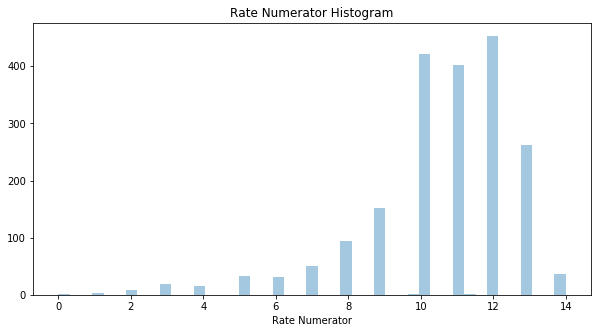

In [153]:
plt.figure(figsize=(10,5))
sns.distplot(df_no_outliers.rate_num,kde=False,axlabel="Rate Numerator").set_title("Rate Numerator Histogram");

We can see from the above plot that many of the rates are between 10 and 12 , with the most rates given are 12

## **1. Does the dog having name or stage has anything to do with them having high rates ?**

## $$H_0: \mu_{with-names} - \mu_{without-names} < 0$$

## $$H_1: \mu_{with-names} - \mu_{without-names} >= 0$$

In [154]:
obs_diff=df_no_outliers.query('name!="None" | dog_stage!="None"').rate_num.mean() - df_no_outliers.query('name=="None" & dog_stage=="None"').rate_num.mean()
obs_diff

0.8459940344375649

In [155]:
df_no_outliers.shape[0]

1990

In [156]:
diff_means=[]
for _ in range(10000):
    sample=df_no_outliers.sample(1990,replace=True)
    diff_means.append(sample.query('name!="None" | dog_stage!="None"').rate_num.mean() - sample.query('name=="None" & dog_stage=="None"').rate_num.mean())
diff_means=np.array(diff_means)

Let's check if the difference is means are normaly distributed or not

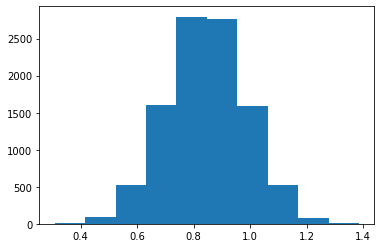

In [157]:
plt.hist(diff_means);

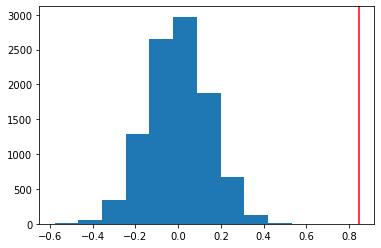

In [158]:
null_vals=np.random.normal(scale=diff_means.std(),size=10000);
plt.hist(null_vals);
plt.axvline(obs_diff,color='red')

We can see from the above plot that having names or dog stages in the tweets results in higher rate for sure , and the difference is statiscally significant , but let's calculate the p-value too

In [159]:
pval=(null_vals > obs_diff).mean()
print("P-value = ",pval)

P-value =  0.0


## **2. Is there any common names for dogs ?**

Let's first change None to NaN to the easy of calculations and plotting

In [160]:
names=df.name.apply(lambda x:np.nan if x=="None" else x)
#let's take only bigger than 5
condition=names.isin(names.value_counts()[(names.value_counts()>5)].index)
names=names[condition]

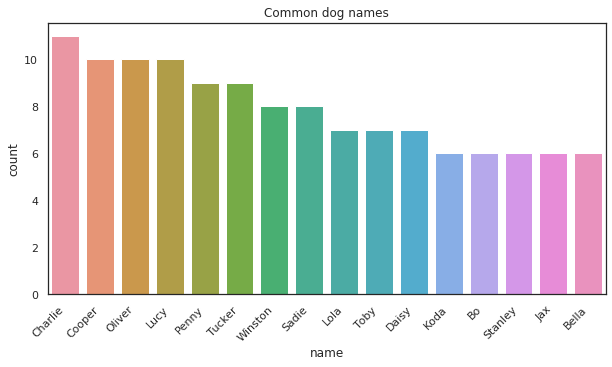

In [175]:
plt.figure(figsize=(10,5))
chart=sns.countplot(names,order=names.value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');
chart.set_title("Common dog names");

We can see that Charlie is the most common name , let's see the average rates for the Charlies vs the average rates (without the outliers)

In [162]:
print("Charlies Rate is {}, Average rate is {}".format(df.query('name == "Charlie"').rate_num.mean(),df_no_outliers.rate_num.mean()))

Charlies Rate is 11.636363636363637, Average rate is 10.553909547738693


Charlies are good boys

### **And here's a photo of the highest rated charlie** 

In [185]:
query='''
SELECT jpg_url FROM 
df_no_outliers
WHERE 
name = 'Charlie'
ORDER BY rate_num desc, 
retweet_count desc,
favorite_count desc
LIMIT 1
'''
from IPython.display import Image
url=sqldf(query,locals())['jpg_url'][0]
Image(url= url, width=500, height=500)

## **3. What are the most common words WeRateDogs say?**

In [163]:
text_bag=""
for text in df.text:
    text_bag=text_bag+text

Let's remove all links from the text_bag

In [164]:
text_bag=re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)',"",text_bag)

In [165]:
from wordcloud import WordCloud

In [166]:
wordcloud = WordCloud().generate(text_bag)

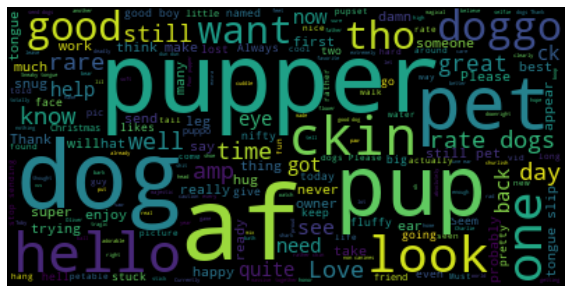

In [167]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **4. Is Posting Time has anything to do with higher rates?**

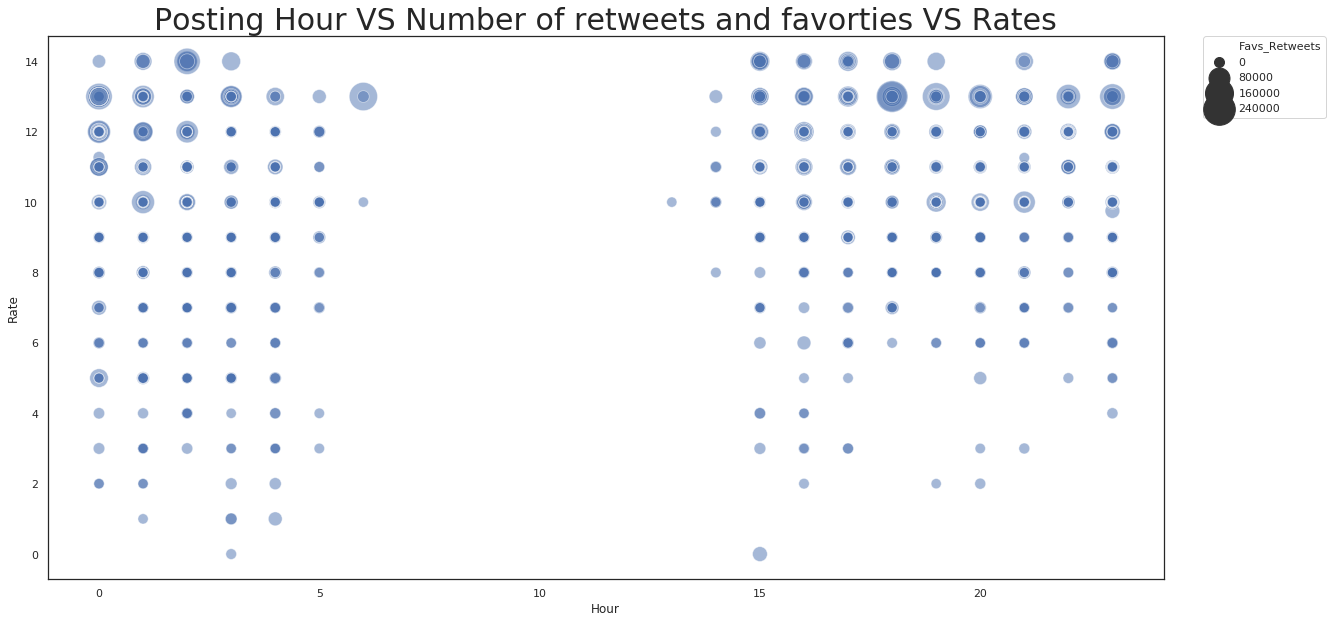

In [168]:
hours_rates=pd.concat([df_no_outliers.timestamp.apply(lambda x:x.hour),
                       df_no_outliers.rate_num,
                       df_no_outliers.retweet_count+df_no_outliers.favorite_count],axis=1)
hours_rates.columns=['Hour','Rate','Favs_Retweets']
hours_rates
plt.figure(figsize=(20,10))
sns.set(style="white");
sns.scatterplot(x=hours_rates.Hour,y=hours_rates.Rate,
                alpha=0.5,size=hours_rates.Favs_Retweets,
                sizes=(100, 1000), palette="muted").set_title("Posting Hour VS Number of retweets and favorties VS Rates",fontsize=30);
plt.legend(loc='upper right',bbox_to_anchor=(1.15, 1.009));

**We can see from the above plot two things </br> 1. There is no activity between 6 AM and 12PM </br>2. Tweets including higher rates is retweeted and favorited more**

## **5. Does any dog stage has more rates than the others?**

since we have list contains pupper and doggo at the same time , we will split those list with the same as single tweets for sake of plotting

In [220]:
df_no_outliers.dog_stage.value_counts()

None                   1623
pupper                  228
doggo                    70
floof                    36
puppo                    28
['pupper', 'doggo']       5
Name: dog_stage, dtype: int64

In [219]:
k=df_no_outliers[df_no_outliers['dog_stage']=="['pupper', 'doggo']"]
k=k.append(k).reset_index(drop=True)
k.loc[:,'dog_stage']=pd.Series(['doggo']*5+['pupper']*5)
k=k.append(df_no_outliers[df_no_outliers['dog_stage']!="['pupper', 'doggo']"])
k.dog_stage.value_counts()

None      1623
pupper     233
doggo       75
floof       36
puppo       28
Name: dog_stage, dtype: int64

In [216]:
stage_num=k.groupby('dog_stage').mean().iloc[1:,:]['rate_num'].to_frame().reset_index()
stage_num

,dog_stage,rate_num
0,doggo,11.800000
1,floof,11.666667
2,pupper,10.641760
3,puppo,12.142857


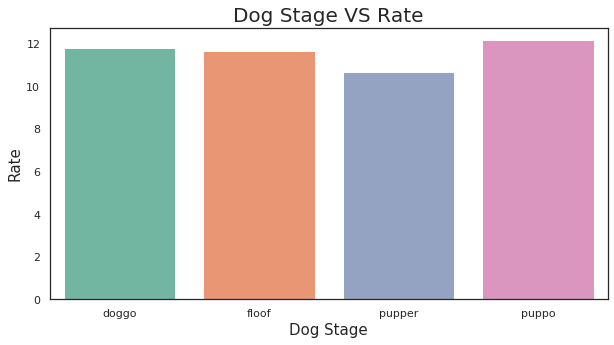

In [217]:
plt.figure(figsize=(10,5));
sns.barplot(x='dog_stage',y='rate_num',data=stage_num,palette='Set2');
plt.xlabel("Dog Stage",fontsize=15);
plt.ylabel("Rate",fontsize=15);
plt.title("Dog Stage VS Rate",fontsize=20);

We can see from the above plots that puppos are rated slightly more than the others

## **6. TOP 5 retweeted and favorited tweets?**

In [171]:
query='''
SELECT * FROM df 
ORDER BY 
retweet_count desc,
favorite_count desc
'''
top_5=sqldf(query,locals()).iloc[0:5,:]
top_5

,id,timestamp,source,text,entities,retweet_count,favorite_count,expanded_urls,rate_num,rate_denom,name,non_twitter_links,hashtags,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog
0,744234799360020481,2016-06-18 18:26:18.000000,http://twitter.com/download/iphone,Here's a doggo realizing you can stand in a po...,"{'hashtags': [], 'symbols': [], 'user_mentions...",79515,131075,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,None,NaN,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador retriever,0.825333,1
1,807106840509214720,2016-12-09 06:17:20.000000,http://twitter.com/download/iphone,This is Stephan. He just wants to help. 13/10 ...,"{'hashtags': [], 'symbols': [], 'user_mentions...",56625,107015,https://twitter.com/dog_rates/status/807106840...,13.0,10.0,Stephan,NaN,None,None,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,1
2,739238157791694849,2016-06-04 23:31:25.000000,http://twitter.com/download/iphone,Here's a doggo blowing bubbles. It's downright...,"{'hashtags': [], 'symbols': [], 'user_mentions...",52360,75163,https://twitter.com/dog_rates/status/739238157...,13.0,10.0,None,NaN,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,Eskimo dog,0.503372,1
3,822872901745569793,2017-01-21 18:26:02.000000,http://twitter.com/download/iphone,Here's a super supportive puppo participating ...,"{'hashtags': [{'text': 'WomensMarch', 'indices...",48265,132810,https://twitter.com/dog_rates/status/822872901...,13.0,10.0,None,NaN,WomensMarch,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland terrier,0.196015,1
4,879415818425184262,2017-06-26 19:07:24.000000,http://twitter.com/download/iphone,This is Duddles. He did an attempt. 13/10 some...,"{'hashtags': [], 'symbols': [], 'user_mentions...",45849,107956,https://twitter.com/dog_rates/status/879415818...,13.0,10.0,Duddles,NaN,None,None,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,English springer,0.383404,1


We can see from the above that all of them has rates of 13/10

Let's see these good boys

In the 1 Place Comes


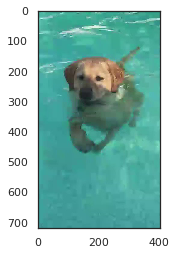

He is a doggo
In the 2 Place Comes


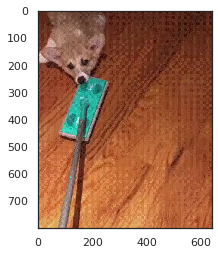

This is Stephan
In the 3 Place Comes


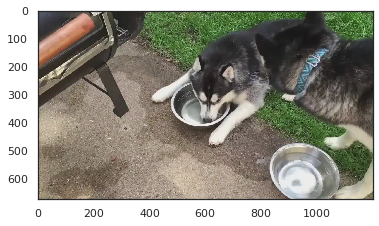

He is a doggo
In the 4 Place Comes


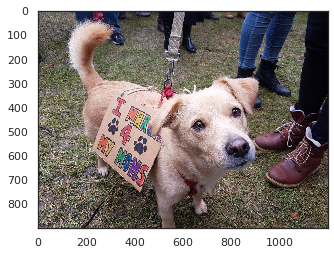

He is a puppo
In the 5 Place Comes


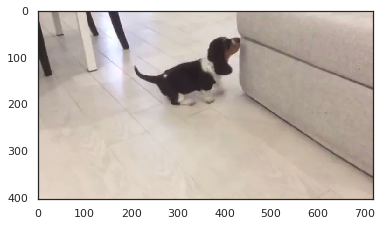

This is Duddles


In [173]:
for ent,i,name,stage in zip(top_5.entities,range(1,6),top_5.name,top_5.dog_stage):
    print("In the {} Place Comes".format(i))
    url=re.findall(r'https://pbs.twimg.com/.*.jpg',ent)[0]
    img=io.imread(url,format='jpg')
    plt.imshow(img)
    plt.show()
    if name!="None":
        print("This is {}".format(name))
    if stage!="None": 
        print("He is a {}".format(stage))
    print("==============================")